In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.set_printoptions(precision=2)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


### Import data

In [2]:
housing1 = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Encode categorical variables (used dummy encoding)

In [4]:
pd.get_dummies(housing1['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [5]:
housing1.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
housing2 = pd.concat([housing1.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing1['ocean_proximity'])], axis=1)
housing2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


### Deal with missing data (used KNN imputation)

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputation = imputer.fit_transform(housing2)
housing3 = pd.DataFrame(imputation, columns = housing2.columns)
housing3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  float64
 10  INLAND              20640 non-null  float64
 11  ISLAND              20640 non-null  float64
 12  NEAR BAY            20640 non-null  float64
 13  NEAR OCEAN          20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


### Put target variable column as final column


In [8]:
housing4 = housing3[['longitude',
                     'latitude',
                     'housing_median_age',
                     'total_rooms',
                     'total_bedrooms',
                     'population',
                     'households',
                     'median_income',
                     '<1H OCEAN',
                     'INLAND',
                     'ISLAND',
                     'NEAR BAY',
                     'NEAR OCEAN',
                     'median_house_value']]

housing4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0,84700.0


### Scale/normalize the training data

In [9]:
# list of feature names
X_features = housing4.columns[:-1]
X_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [10]:
X_train, y_train = housing4.to_numpy()[:, :-1], housing4.to_numpy()[:, -1]

X_train.shape, y_train.shape

((20640, 13), (20640,))

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.fit_transform(A[:, :8])
  return A

X_train = preprocessor(X_train)

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327835,1.052548,0.982143,-0.804819,-0.971865,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.352103,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.826766,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719725,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612685,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0


### Create and fit the regression model (gradient descent)

In [13]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 37, number of weight updates: 763681.0


### View Parameters

In [14]:
b_train = sgdr.intercept_
w_train = sgdr.coef_
print(f"model parameters: w: {w_train}, b:{b_train}")

model parameters: w: [-52822.86 -55536.64  12452.24 -11947.99  39517.76 -44269.89  22289.44
  75294.71  47875.41   7837.69  16053.88  42870.93  52079.64], b:[172458.15]


### Predictions

In [15]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_train)
# make a prediction using w,b. 
y_pred = np.dot(X_train, w_train) + b_train
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:5]}" )
print(f"Target values \n{y_train[:5]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[408362.85 423391.49 376659.98 318255.21 251392.88]
Target values 
[452600. 358500. 352100. 341300. 342200.]


In [16]:
from sklearn.metrics import mean_squared_error as mse
mse(sgdr.predict(X_train), y_train, squared=False)

68764.35856796397

### Plotting results

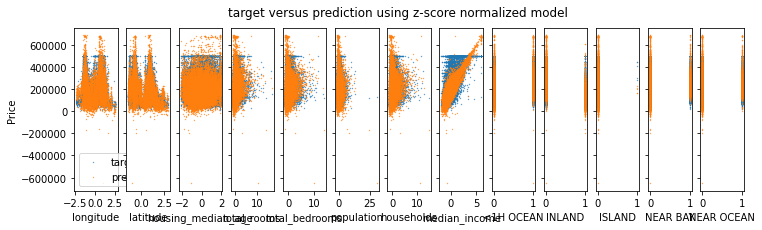

In [17]:
import matplotlib.pyplot as plt

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(X_features),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target', s = 0.1)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict', s = 0.1)
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()